In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import linear_regression
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib.lines import Line2D

import energy_analysis_helpers

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-r5use7fz because the default path (/home/sarslan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
FIG_SIZE = (8,5)
plt.rcParams["figure.figsize"] = FIG_SIZE
FONT_SIZE = 16
LINE_STYLE = (0,(4,4))
LINE_WIDTH = 3.5
SAVE_FIG = False

In [3]:
EXP_ID = '230519-1608'
data_folder = '../data/' + EXP_ID + '/'
exp_filename = data_folder + 'energy.log'

if (SAVE_FIG):
    out_dir = '../outputs/' + EXP_ID + '/'
    if (not os.path.exists(out_dir)):
        os.mkdir(out_dir)

# Reading the Experiment Data

In [4]:
exp_df = energy_analysis_helpers.read_energy_log(exp_filename)
exp_df['energy_kJ'] = exp_df['energy_uJ'] * 10e-9
exp_df = energy_analysis_helpers.read_iperf_log(exp_df, data_folder)
exp_df

,cc,mtu,bitrate,n_core,duration,cnt,energy_uJ,energy_kJ,total_cpu_util_percent,user_cpu_util_percent,system_cpu_util_percent,time_sec,sent_bytes,bps,rtx_pkts,min_rtt,mean_rtt,max_rtt,max_cwnd
0,stress,1500,0,0,10.0,1,2.320893e+08,2.320893,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,stress,1500,0,0,10.0,2,2.293845e+08,2.293845,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,stress,1500,0,0,10.0,3,2.187828e+08,2.187828,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,stress,1500,0,0,10.0,4,2.144204e+08,2.144204,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,stress,1500,0,0,10.0,5,2.155039e+08,2.155039,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,cubic,1500,10,0,100.0,16,4.251104e+09,42.511042,38.011476,1.554561,36.456914,100.000203,9.090590e+10,7.272457e+09,42265.0,0.499,0.524,0.550,393856.0
1377,cubic,1500,10,0,100.0,17,4.090937e+09,40.909369,43.079627,1.526182,41.553445,100.000140,9.453987e+10,7.563179e+09,36076.0,0.487,0.644,0.801,1070072.0
1378,cubic,1500,10,0,100.0,18,4.218182e+09,42.181822,43.086089,1.585315,41.500774,100.000034,9.901100e+10,7.920877e+09,30719.0,0.535,0.890,1.246,1443656.0
1379,cubic,1500,10,0,100.0,19,4.410252e+09,44.102523,43.307424,1.675324,41.632100,100.000148,9.722934e+10,7.778336e+09,39114.0,0.526,0.593,0.660,683456.0


# Energy Consumption Analysis

In [5]:
if ('n_core' not in exp_df.columns):
    exp_df.groupby(['duration', 'cc'])['energy_kJ'].mean().unstack().plot.bar(
        yerr=exp_df.groupby(['duration', 'cc'])['energy_kJ'].std().unstack(), 
        error_kw=dict(lw=2, capsize=3, capthick=1, ecolor='black')
        )

    plt.xlabel('Experiment Duration (sec)', fontsize=FONT_SIZE)
    plt.ylabel('Ave. Energy (KJ)', fontsize=FONT_SIZE)
    plt.xticks(fontsize=FONT_SIZE)
    plt.yticks(fontsize=FONT_SIZE)
    # plt.ylim((0,50))
    plt.xticks(rotation = 0)
    plt.grid(linestyle=LINE_STYLE)
    leg = plt.gca().legend(loc='upper left', frameon=False, fontsize=FONT_SIZE)
    # plt.setp(leg.get_title(),fontsize=FONT_SIZE)
    plt.gca().spines["right"].set_linestyle(LINE_STYLE)
    plt.gca().spines["right"].set_alpha(0.5)
    plt.gca().spines["right"].set_color('gray')
    plt.gca().spines["left"].set_linestyle(LINE_STYLE)
    plt.gca().spines["left"].set_alpha(0.5)
    plt.gca().spines["left"].set_color('gray')
    plt.gca().spines["top"].set_visible(False)
    # plt.gca().spines["top"].set_linestyle(LINE_STYLE)
    # plt.gca().spines["top"].set_alpha(0.5)
    # plt.gca().spines["top"].set_color('gray')
    plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["bottom"].set_color('gray')
    plt.tight_layout()

    if (SAVE_FIG):
        plt.savefig( out_dir + '/cubic_vs_sleep_energy.pdf')

    plt.show()

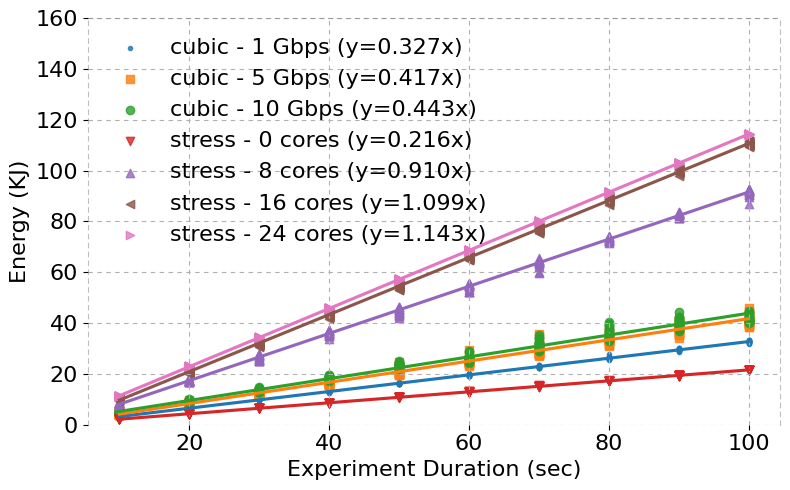

In [6]:
plt.figure(figsize=FIG_SIZE)

marker = 0
for cca, df in exp_df.groupby('cc'):
    # x = np.hstack((np.reshape(ddf['time_sec'], (-1, 1)), np.ones((len(ddf),1))))
    # y = np.reshape(ddf['energy_kJ'], (-1, 1))
    # fit = np.linalg.lstsq(x, y, rcond=None)[0]

    if (cca in ['stress', 'sleep']):
        for n_core, ddf in df.groupby('n_core'):
            slope, _ = linear_regression(ddf['time_sec'], ddf['energy_kJ'], proportional=True)

            sns.regplot(ddf, x = 'time_sec', y = 'energy_kJ', 
                        label='{} - {} cores (y={:.3f}x)'.format(cca, n_core, slope), ax=plt.gca(),
                        marker=list(Line2D.markers.keys())[marker])
            marker += 1
    else:
        for bitrate, ddf in df.groupby('bitrate'):
            slope, _ = linear_regression(ddf['time_sec'], ddf['energy_kJ'], proportional=True)

            sns.regplot(ddf, x = 'time_sec', y = 'energy_kJ', 
                        label='{} - {} Gbps (y={:.3f}x)'.format(cca, bitrate, slope), ax=plt.gca(),
                        marker=list(Line2D.markers.keys())[marker])
            marker += 1

plt.xlabel('Experiment Duration (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim((0,160))
plt.xticks(rotation = 0)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='upper left', frameon=False, fontsize=FONT_SIZE)
# plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
# plt.gca().spines["top"].set_visible(False)
plt.gca().spines["top"].set_linestyle(LINE_STYLE)
plt.gca().spines["top"].set_alpha(0.5)
plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_visible(False)
# plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
# plt.gca().spines["bottom"].set_alpha(0.5)
# plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/cubic_vs_stress_energy_fit.pdf')

plt.show()